   <h1> Credit Card Fraud Detection </h1>
   
   #### By Elva Ma

<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#Description">Description</a></li>
    <li><a href="#Problem">Problem</a></li>
    <li><a href="#Setup">Setup</a></li>
    <li><a href="#Loading Data">Loading Data</a></li>
    <li><a href="#Exploration Data Analysis">Exploration Data Analysis</a></li> 
    <div>
        1.	Understand data<br>
        2.	Check missing value<br>
        3.	Check the balance of the transactions<br></div>
    <li><a href="#Data preprocessing">Data preprocessing</a></li>
    <div>
        1.	Feature Scaling<br>
        2.	Splitting the dataset into the training set and test set<br></div>
    <li><a href="#Balancing the classes">Balancing the classes</a></li>
    <div>
        1.	Random undersampling<br>
        2.	Random oversampling<br>
        3.	Synthetic Minority Over-sampling (SMOTE)<br>
        4.	Random Oversampling VS. SMOTE<br></div>
    <li><a href="#Modeling">Modeling</a></li>
    <div>
        1. logistic regression <br>
        2. Decision Tree <br>
        3. Random Forest <br> </div>
    <li><a href="#Test Set Evaluation of the Best Model">Test Set Evaluation of the Best Model</a></li>
    <li><a href="#Conclusion">Conclusion</a></li>
</ol>
</div>
 
<hr>

 ### 1. Description

Global card fraud losses amounted to 22.8 billion US dollar in 2017 and is foreseen to continue to grow. a detection strategy needs to take into account some peculiarities of the fraud phenomenon: unbalancedness (frauds are less than 1% of all transactions), concept drift (typically due to seasonal aspects and fraudster strategies) and the big data and streaming nature. Disregarding those aspects might lead to high false alert rate, low detection accuracy or slow detection. The purpose of this analysis is to understand and help Credit card companies to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The dataset will use in this case analysis is donwloard from [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv). 

### 2. Problem
The goal of this project is to construct models to predict whether a credit card transaction is fraudulent.


<h2>3. Setup</h2>

#### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import MiniBatchKMeans
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

## 4. Loading Data

In [4]:
df = pd.read_csv("G:\Python\Case Study\Credit Card Fraud Detection\creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 5. Exploration Data Analysis

#### Understand data

In [6]:
print("Few Entries: ")
print(df.head())
print("Dataset Shape: ", df.shape)
print("Maximum Transaction Value: ", np.max(df.Amount))
print("Minimum Transaction Value: ", np.min(df.Amount))

Few Entries: 
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       

This dataset contains 284807 rows and 31 numeric columns, and all data represented as Numerical variables.

#### Check missing value

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.isnull().any().any()

False

"True" represents a missing value, "False" means the value is present in the dataset. As result, there is no missing values in the dataset.

##### Let's representing the different between frauds and normal transactions in graphical

#### Check the balance of the transactions

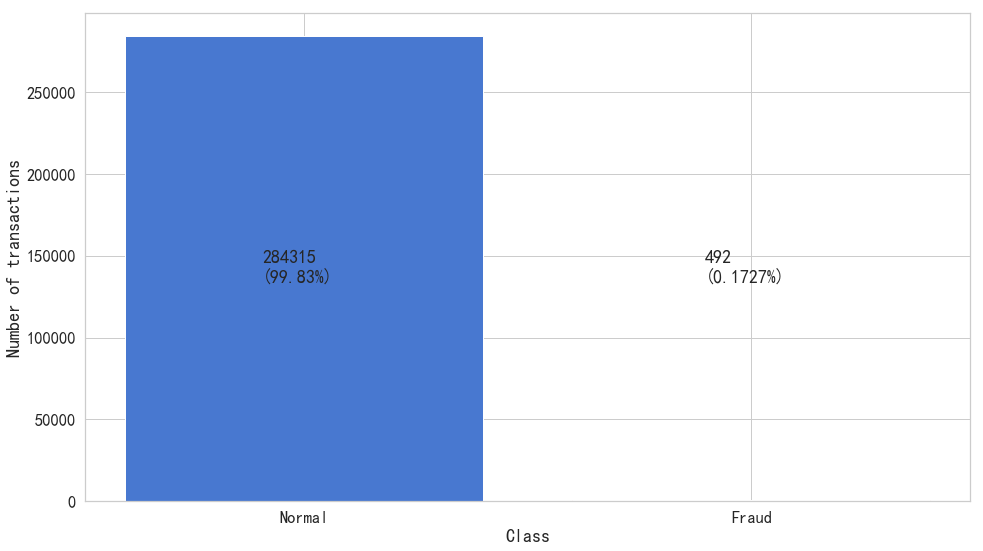

In [9]:
plt.bar(['Normal','Fraud'], df['Class'].value_counts(), color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[0], 
                                         df['Class'].value_counts()[0]/df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[1], 
                                         df['Class'].value_counts()[1]/df['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()

In [10]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [11]:
frauds.shape

(492, 31)

In [12]:
normal.shape

(284315, 31)

The dataset has only two classes as Normal and Frauds, and it is highly imbalanced with 99.83% of observations belonging to Normal transaction and only 0.17% as a fraudulent transaction. It's reasonable because the normal(non-frauds) transaction is larger than the frauds.

#### I also want to know how often fraudulent transactions occur during a certain time.

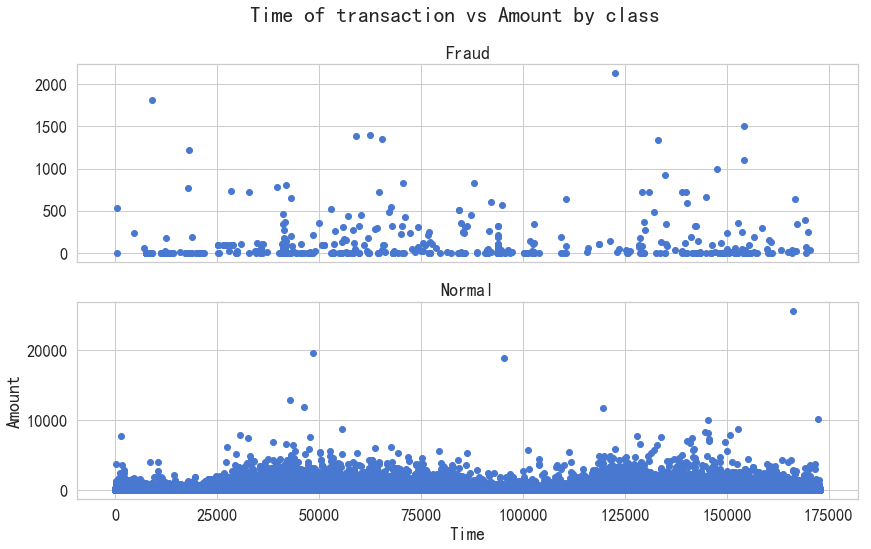

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

It looks like the time of transaction doesn't matter, it's not a good predictor for frauds. As seen above, the pattern for both Normal and Fraudulent transactions seems to be random regarding the hour of the day.

Number of outliers below the lower bound:  0  (0.0%)
Number of outliers above the upper bound:  31904  (11.2%)


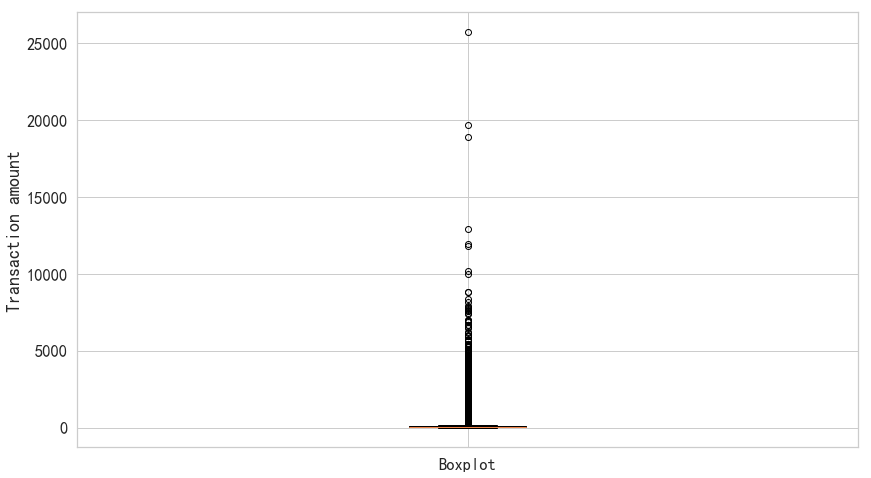

In [14]:
plt.boxplot(df['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction amount')
plt.plot()

amount = df[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amount,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print('Number of outliers below the lower bound: ', amount[amount['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amount[amount['Amount'] < lower_bound].count()[0] / amount['Amount'].count() * 100))
print('Number of outliers above the upper bound: ', amount[amount['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount[amount['Amount'] > upper_bound].count()[0] / amount['Amount'].count() * 100))

The interquartile range method found 31904 outliers, which represents 11.2% of the observations. Removing them from the dataset would be a bad idea due to the loss of a large amount of information for the machine learning models.

## 6. Data preprocessing

The dataset is all labeled data, means I can use Supervised Machine Learning to analysis the fraudulent transactions. It can be used by classifiers, adjust and compare data to find the most efficient fraud detection model.

In [15]:
df[df['Class']==1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


#### Feature Scaling 

Here I will drop Time colume and scale Amount features

In [16]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [17]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Splitting the dataset into the training set and test set

In [18]:
X= data.drop(columns=['Class'])
y= data['Class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=0)

## 7. Balancing the classes

#### After split the observations into a training set and a testing set. I need to balance the classes after we set some observations aside to be used as a test set! Otherwise, the models might use part of the test data during the training, which will lead to overfitting. There are two common methods to deal with imbalanced data problem: under-sampling and over-sampling, but I will also test Synthetic Minority Over-sampling (SMOTE).

### Random undersampling

In [20]:

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42, replacement=False)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

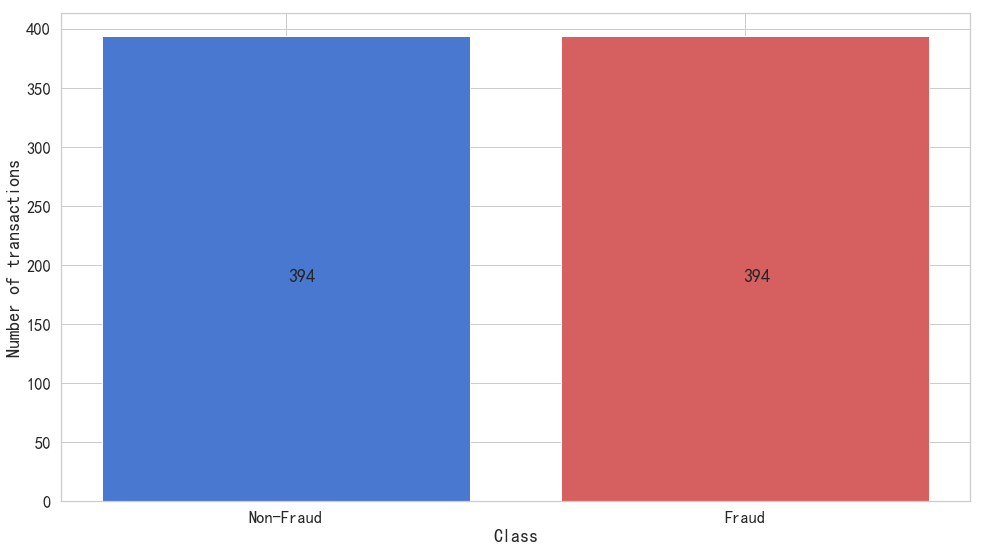

In [21]:
# Checking If classes are balanced:
from collections import Counter
plt.bar(['Non-Fraud','Fraud'], [Counter(y_rus)[0], Counter(y_rus)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_rus)[0]), (0.25, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_rus)[1]), (0.75, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

In [22]:
assert Counter(y_rus)[1] == Counter(y_train)[1] #Checking if they have the same number of fraud cases

### Random oversampling

In [23]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

Checking If classes are balanced:

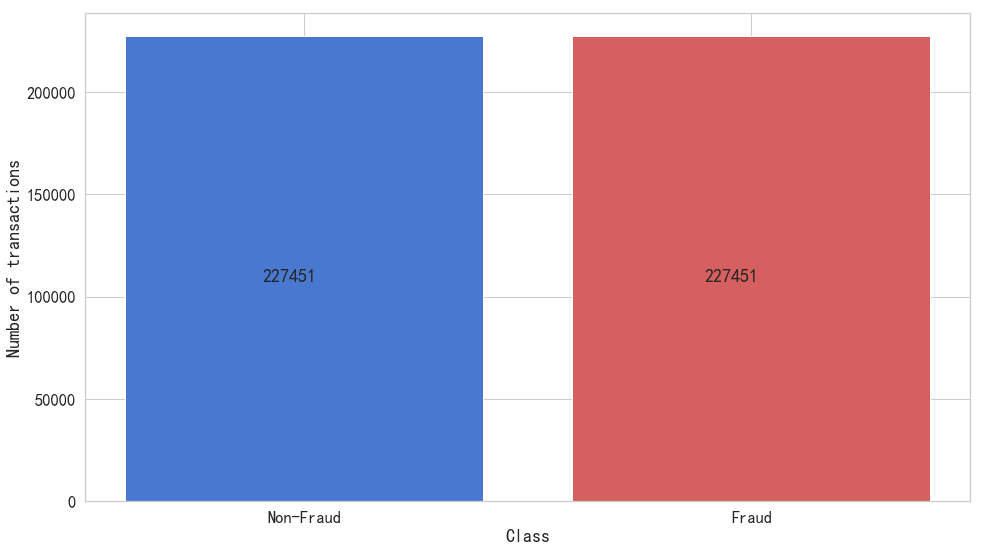

In [24]:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_ros)[0], Counter(y_ros)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_ros)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_ros)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

In [25]:
assert Counter(y_ros)[0] == Counter(y_train)[0] #Checking if they have the same number of non-fraud cases

### Synthetic Minority Over-sampling (SMOTE)

In [26]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

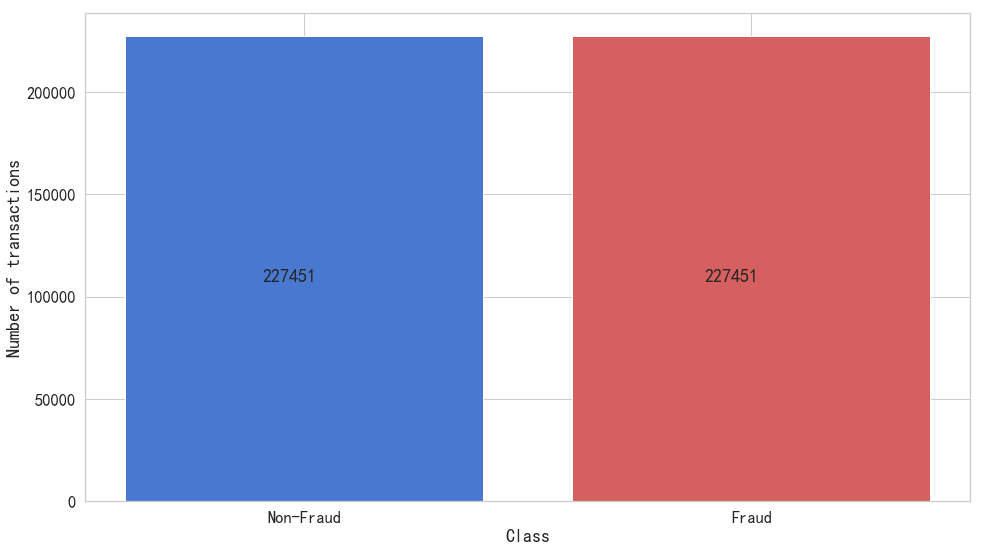

In [27]:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_smote)[0], Counter(y_smote)[1]], color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_smote)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_smote)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

In [28]:
assert Counter(y_smote)[0] == Counter(y_train)[0] #Checking if they have the same number of non-fraud cases

### Random Oversampling VS. SMOTE

The graphs in this section will display as 2D to show many features. Let's create a function to perform feature scaling because some models need this prior to fitting and we can use it more than one time

In [29]:
def feature_scaling(X, X_test=X_test):
    std_scale = StandardScaler().fit(X)
    X_std = std_scale.transform(X)
    X_test_std = std_scale.transform(X_test)
    return X_std, X_test_std

Transforming all the sets using different types of sampling:

In [30]:
X_rus_std, X_test_rus_std = feature_scaling(X_rus)
X_ros_std, X_test_ros_std = feature_scaling(X_ros)
X_smote_std, X_test_smote_std = feature_scaling(X_smote)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_ros_pca = pca.fit_transform(X_ros_std)
X_smote_pca = pca.fit_transform(X_smote_std)

Creating a function to visualize the data distribution after the PCA

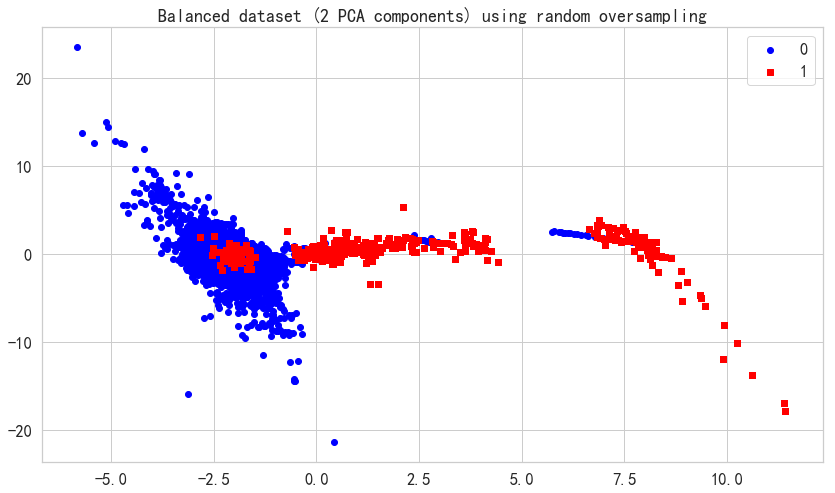

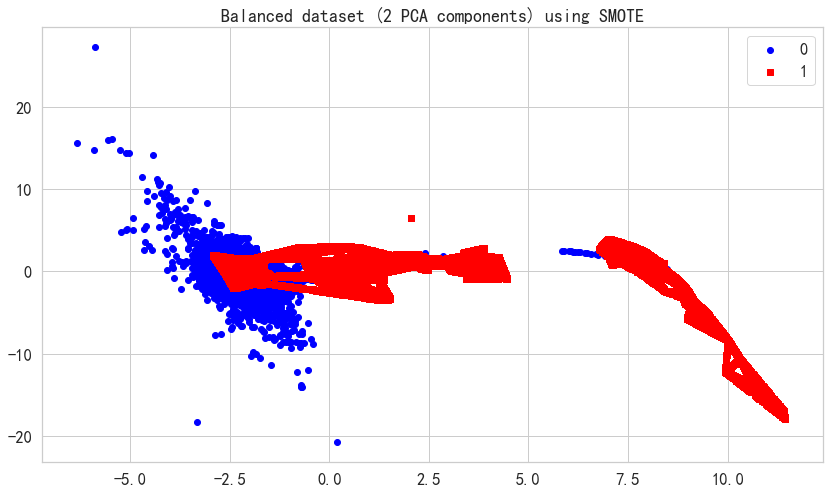

In [32]:
def plot_2d_space(X, y, label='Classes'):
    '''Plots the data points in a 2D scatterplot.'''
    colors = ['blue', 'red']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y==l, 0], X[y==l, 1], c=c, label=l, marker=m)
    plt.title(label)
    plt.legend(loc='best')
    plt.show()

plot_2d_space(X_ros_pca, y_ros, 'Balanced dataset (2 PCA components) using random oversampling')
plot_2d_space(X_smote_pca, y_smote, 'Balanced dataset (2 PCA components) using SMOTE')


In the above observations that 1 as fraudulent transactions in different coordinates. and PCA can visualize the data in 2D shows Fraud and normal transactions are distinct and each class has its own cluster. 

## 8. Modeling
 
<div>

1. logistic regression <br>
2. Decision Tree <br>
3. Random Forest <br>
</div> <hr>
 
 ### logistic regression

In [33]:
# fit a logistic regression model to the data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
# obtain model predictions
predicted = model.predict(X_test)

In [40]:
# predict probabilities
probs = model.predict_proba(X_test)

In [41]:
print("Accuracy Score: {}".format(accuracy_score(y_test, predicted)))

Accuracy Score: 0.9991748885221726


In [42]:
# print the ROC score
print("ROC score: {}\n".format(roc_auc_score(y_test, probs[:,1])))

# print the classifcation report and confusion matrix
print("Classification report:\n{}\n".format(classification_report(y_test, predicted)))

# print confusion matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print("Confusion matrix:\n{}\n".format(conf_mat))

ROC score: 0.9636919237306628

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.63      0.73        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.92      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Confusion matrix:
[[56853    11]
 [   36    62]]



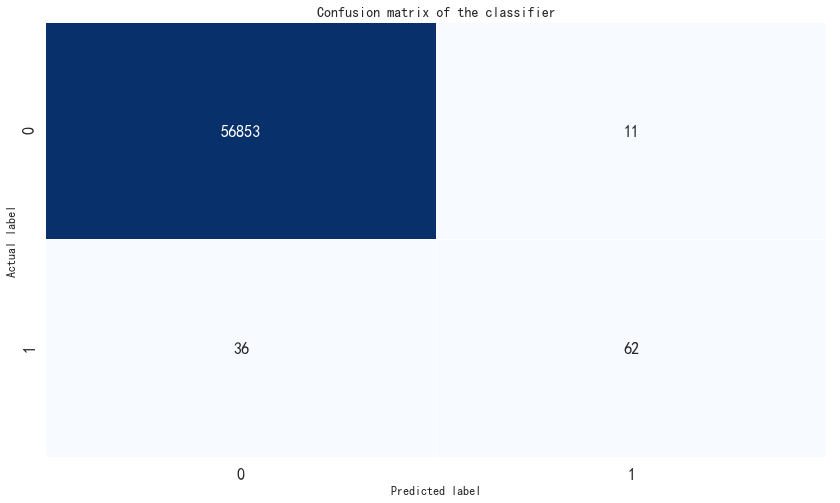

In [43]:
# plot the confusion matrix
sns.heatmap(conf_mat, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("cm.png", bbox_inches="tight")
plt.show()

We can see, there are 63 out of 98 fraud cases, but only 11 false positive and 35 false negative, it's good result for logistic regression model.

### Decision Tree

In [44]:
# define the Decision Tree model with balanced weight
tree_model = DecisionTreeClassifier(random_state=0, class_weight="balanced")

In [45]:
# fit the model to our training data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [46]:
# obtain predictions from the test data 
predicted_tree = tree_model.predict(X_test)

In [47]:
# predict probabilities
probs_tree = tree_model.predict_proba(X_test)

In [48]:
# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted_tree)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs_tree[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted_tree)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predicted_tree)))

Accuracy Score: 0.9989817773252344

ROC score = 0.8568790698609214

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.71      0.71        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.85      0.86      0.85     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56834    30]
 [   28    70]]



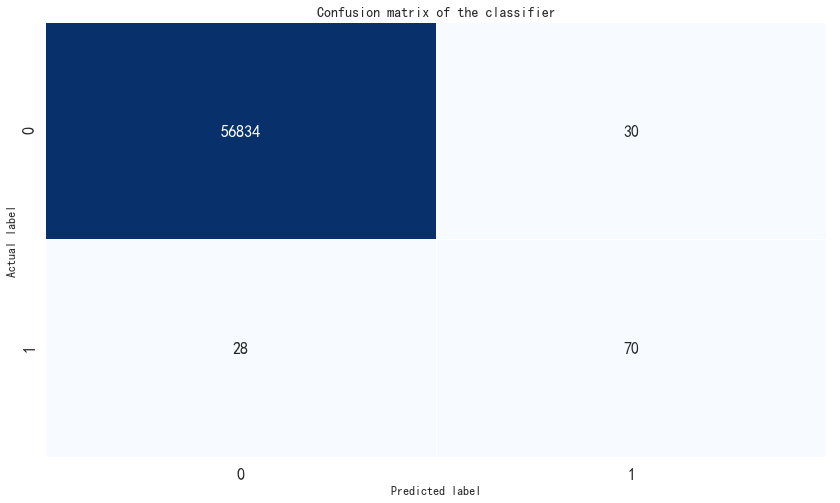

In [49]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, predicted_tree), annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()

In the decision tree model, there are 70 out of 98 fraud cases, but only 30 false positive and 28 false negatives. Compared to the logistic regression, decision tree has more false positives which is a better model

### Random Forest

Note: When the dataset is a balanced dataset, that will mode uses the values of y to automatically adjust weight inversely proportional to class frequencies. The dataset I am using is a highly imbalanced fraud data which need to use class_weights to define the sklearn model.

In [50]:
# define the model as the random forest
RF = RandomForestClassifier(class_weight="balanced_subsample", random_state=0)

In [51]:
# fit the model to our training set
RF.fit(X_train, y_train)

C:\Users\Elva\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [52]:
# obtain predictions from the test data 
predicted_rf = RF.predict(X_test)

In [53]:
# predict probabilities
probs_rf = RF.predict_proba(X_test)

In [54]:
# print the accuracy score, ROC score, classification report and confusion matrix
print("Accuracy Score: {}\n".format(accuracy_score(y_test, predicted_rf)))
print("ROC score = {}\n".format(roc_auc_score(y_test, probs_tree[:,1])))
print("Classification Report:\n{}\n".format(classification_report(y_test, predicted_rf)))
print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, predicted_rf)))

Accuracy Score: 0.9994733330992591

ROC score = 0.8568790698609214

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.71      0.82        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.99      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56862     2]
 [   28    70]]



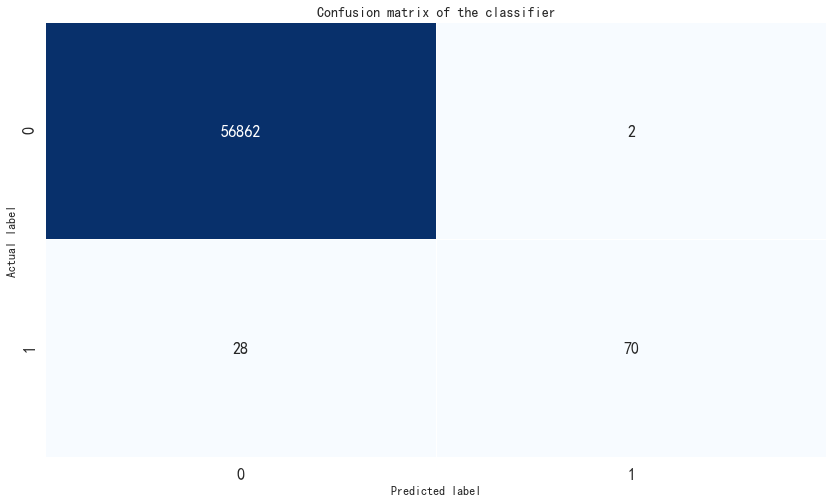

In [55]:
# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, predicted_rf), annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title("Confusion matrix of the classifier", fontsize=14)
plt.ylabel("Actual label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()

The result of Random Forest is same as Decision Tree

## 9. Test Set Evaluation of the Best Model

The class SGDClassifier implements multiple linear classifiers with SGD training, which makes learning much faster on large datasets. We'll implement the model as a machine learning pipeline that includes StandardScaler for data standardization (rescaling each variable to zero mean and unit variance).

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [57]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

Set the hyperparameter grids to search over, one grid for the linear SVC and one for logistic regression:

In [58]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

We'll use matthews_corrcoef [(the Matthews correlation coefficient, MCC)](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient)as our scoring metric.

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

In [60]:
MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [61]:
# Perform the grid search:
import warnings
with warnings.catch_warnings(): # Suppress warnings from the matthews_corrcoef function
    warnings.simplefilter("ignore")
    grid_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  6.2min finished


Mean cross-validated MCC score of the best estimator found:

In [62]:
grid_sgd.best_score_

0.8207740868809423

This is a pretty good MCC score---random guessing has a score of 0, and a perfect predictor has a score of 1. Now check the best hyperparameters found in the grid search:

According the to cross-validated Mcc scores, Decision Tree and Random Forest are both the best performing model, but here I only choose Random Forest to evalualte its performance on the test set.

In [63]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [64]:
def classification_eval(estimator, X_test, y_test):
    """
    Print several metrics of classification performance of an estimator, given features X_test and true labels y_test.
    
    Input: estimator or GridSearchCV instance, X_test, y_test
    Returns: text printout of metrics
    """
    y_pred = estimator.predict(X_test)
    
    # Number of decimal places based on number of samples
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, y_pred), '\n')
    
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred, digits=dec))
    print('SCALAR METRICS')
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
        print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
        print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))

#### Evaluate the random forest on the test set:

In [65]:
classification_eval(RF, X_test, y_test)

CONFUSION MATRIX
[[56862     2]
 [   28    70]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99951   0.99996   0.99974     56864
           1    0.97222   0.71429   0.82353        98

   micro avg    0.99947   0.99947   0.99947     56962
   macro avg    0.98587   0.85713   0.91163     56962
weighted avg    0.99946   0.99947   0.99943     56962

SCALAR METRICS
          MCC = 0.83310
        AUPRC = 0.80135
        AUROC = 0.91297
Cohen's kappa = 0.82327
     Accuracy = 0.99947


According to the MCC, the random forest performed better on the test set than on the training set.

## 10. Conclusion

In this project analysis. I observed the different between frauds and normal transactions and checked the balance of the dataset. I used Under-sampling, Over-sampling and Synthetic Minority Over-sampling (SMOTE) model to deal with high imbalanced data and compared Random Oversampling and SMOTE. I used supervised machine learning techniques to detect fraud cases, such as Logistic regression, decision tree and random forest. At end, I tested and evaluated dataset found out the best model is Random Forest. 